<a href="https://colab.research.google.com/github/Xeron66/Quantum-Computing-Notes/blob/main/Lec_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=aca76ce68488c5f4c3aeda96a93b12c7553e87cee0cb5a9e95e5b1d001722e92
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━

# Importing Libraries

In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
import numpy as np

# Superposition


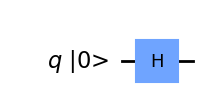

In [ ]:
# create circuit
circuit = QuantumCircuit(1)

# apply gate
circuit.h(0)

# draw circuit
circuit.draw(output = 'mpl', initial_state = True)


In [ ]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-29-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [ ]:
print(final_state)
array_to_latex(final_state)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

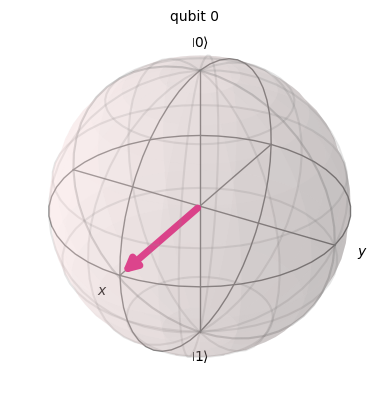

In [ ]:
plot_bloch_multivector(final_state)

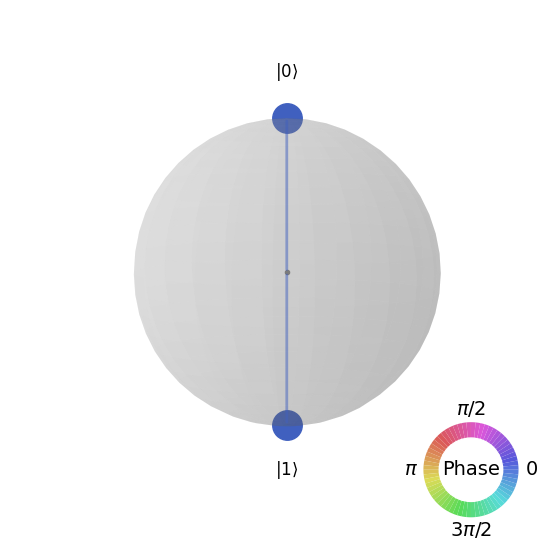

In [ ]:
plot_state_qsphere(final_state)

now doing the same but with measurement...

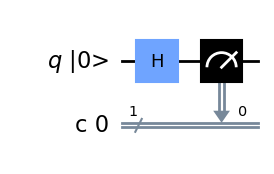

In [ ]:
# create circuit
circuit = QuantumCircuit(1, 1)

# apply gate
circuit.h(0)

# measure
circuit.measure(0, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state = True)


In [ ]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-37-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


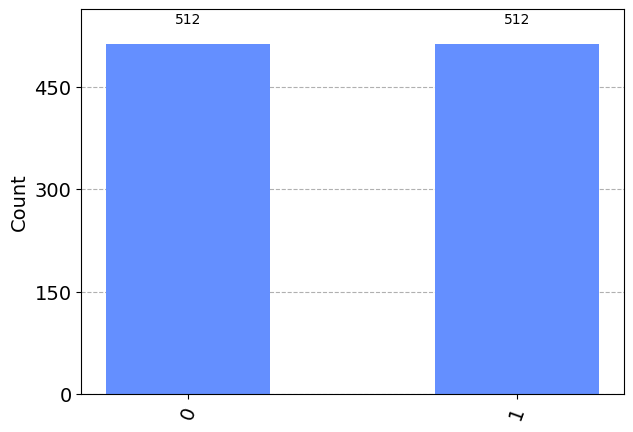

In [ ]:
# plotting histogram
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
print(final_state)
array_to_latex(final_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

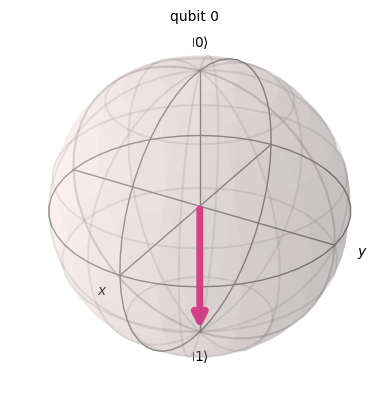

In [ ]:
plot_bloch_multivector(final_state)

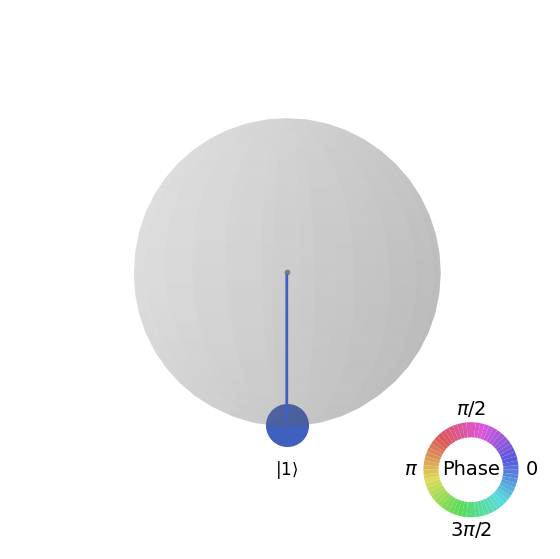

In [ ]:
plot_state_qsphere(final_state)

so from this we can clearly see that, if we apply measure then the superposition of the qbit collapses i.e., we get a non superpositioned final state.

# Entanglement
When two or more particles such as, a pair of photons or electrons become entangled, they remain **connected** even when separated by **vast distances**.

Basically, in a connected pair, if one particle goes through changes, the other is also affected even tho there huge distance between them!

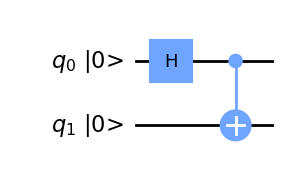

In [ ]:
## create circuit
circuit = QuantumCircuit(2)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)

# applying Controlled NOT gate, CX gate
circuit.cx(0, 1)


## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


we want to see whether if changing one qbit, the other qbit is being manipulated or not.

To see that we will have to see the statevectors

In [ ]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-22-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [ ]:
print(final_state)
array_to_latex(final_state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

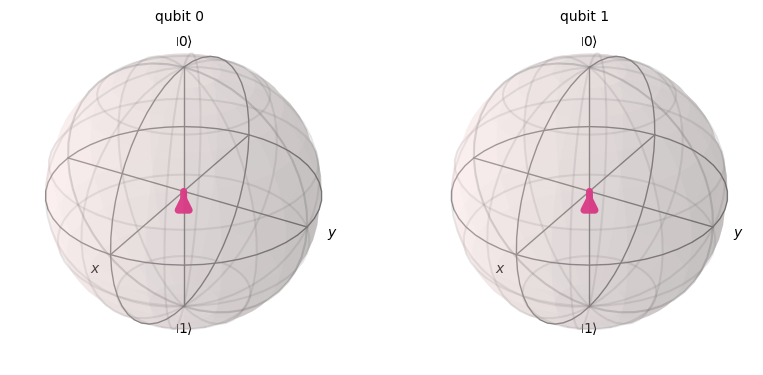

In [ ]:
plot_bloch_multivector(final_state)

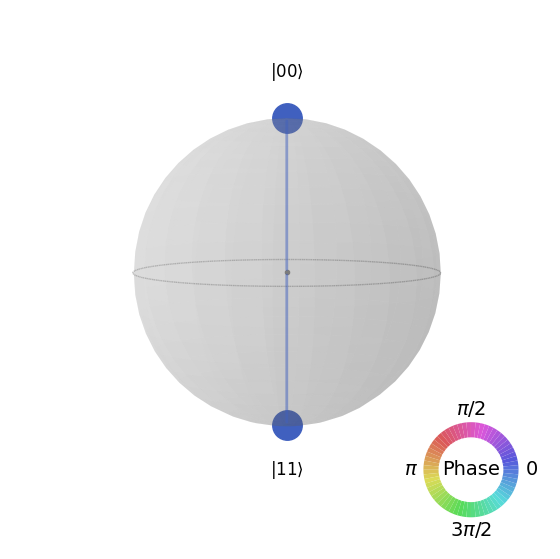

In [ ]:
plot_state_qsphere(final_state)

from the qsphere we can clearly see that the qbits are in entangled state i.e., theyre connected and in a superposition state.

Now, doing the same circuit but with measurement...

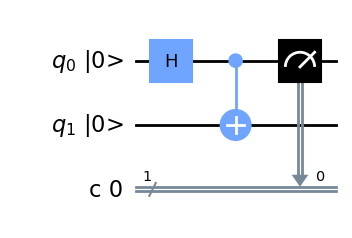

In [ ]:
## create circuit
circuit = QuantumCircuit(2, 1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)

# applying Controlled NOT gate, CX gate
circuit.cx(0, 1)

# apply measurement
# here we are measuring 0th qbit and storing in 0th cbit
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [ ]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-45-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


In [ ]:
print(final_state)
array_to_latex(final_state)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

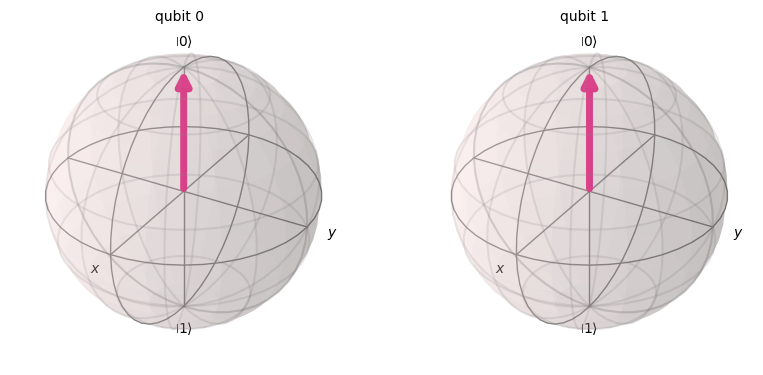

In [ ]:
plot_bloch_multivector(final_state)

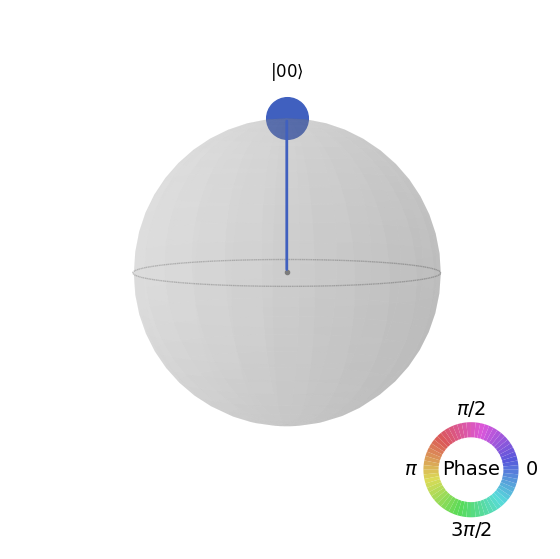

In [ ]:
plot_state_qsphere(final_state)

here we only applied measurement to 0th qbit and we saw that the 0th qbit superposition actually collapsed, but here we can also see that the 1th qbit's superposition also collapsed even though we didn't apply measurement to it. This is entanglement as changing stuffs of one qbit also affected the other qbit.

# Uncertainty Principle in action
also called Heisenberg uncertainty principle states that, the position and velocity of a particale can't be measured exactly at the same time even in theory.

There are three basis,
1. Z basis / standard basis / computational basis (Default)
2. X basis / hadamard basis
3. y basis / circular basis

If we initialize z - basis and measure in z - basis -> the outcome is certain

If we initialize z - basis and measure in x - basis -> the outcome is random

## Z Basis Measurement


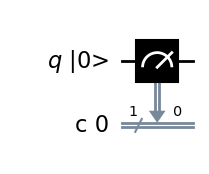

In [4]:
## create circuit
circuit = QuantumCircuit(1, 1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
# circuit.h(0)

## apply measure
circuit.measure(0, 0) # Z - basis measurement (default)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [ ]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-21-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


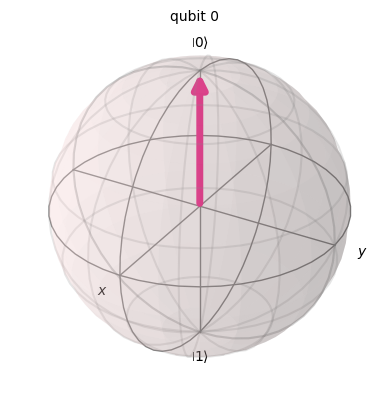

In [ ]:
plot_bloch_multivector(final_state)

so in Z basis, no matter how many times we run this, it will always give |0> state here as it is initialized in z basis and the initial state is also |0>

## X - Basis Measurement

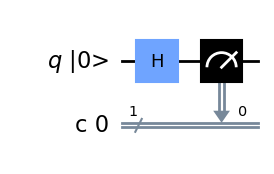

In [94]:
## create circuit
circuit = QuantumCircuit(1, 1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)

## apply measure
circuit.measure(0, 0) # Z - basis measurement (default)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [95]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-95-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Initial State:

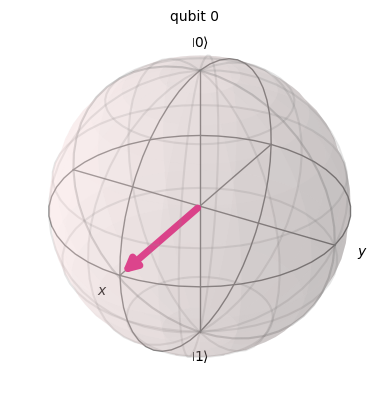

In [90]:
plot_bloch_multivector(final_state)

Final State:

1st try:

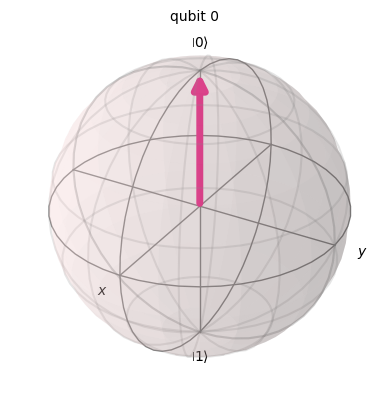

In [93]:
plot_bloch_multivector(final_state)

2nd try:

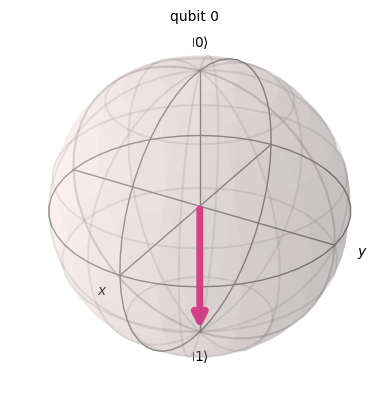

In [96]:
plot_bloch_multivector(final_state)

Here if we ran it multiple times, the outcome will be random.

Now

initialize x - basis

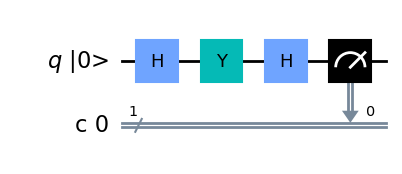

In [22]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)
circuit.y(0)

## apply measure
circuit.h(0)
circuit.measure(0, 0) # x - basis measurement (default)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [23]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-23-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


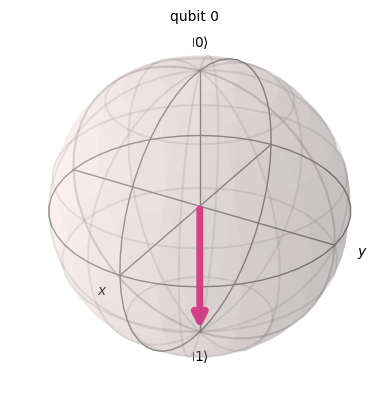

In [24]:
plot_bloch_multivector(final_state)

Now

intialize x - basis and measure in z - basis

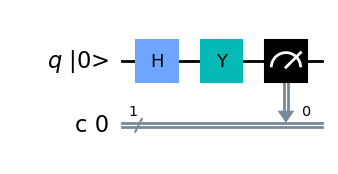

In [85]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates

# applying Hadamard gate to make the qbit go into superposition
circuit.h(0)
circuit.y(0)

## apply measure
# circuit.h(0)
circuit.measure(0, 0) # x - basis measurement (default)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [86]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-86-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Initial State:

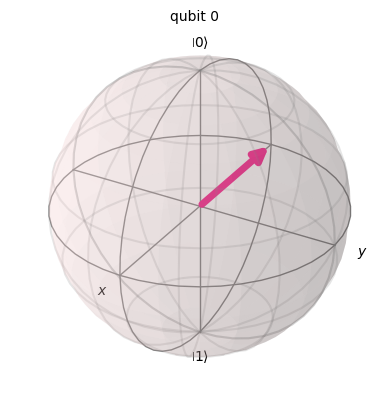

In [75]:
plot_bloch_multivector(final_state)

Final State:

1st try:

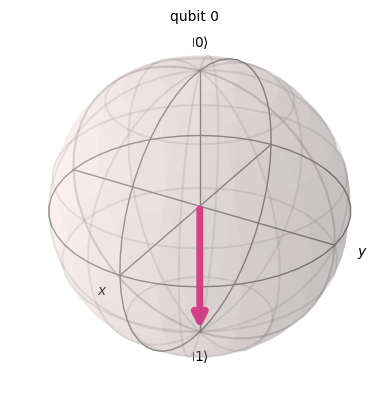

In [78]:
plot_bloch_multivector(final_state)

2nd try:

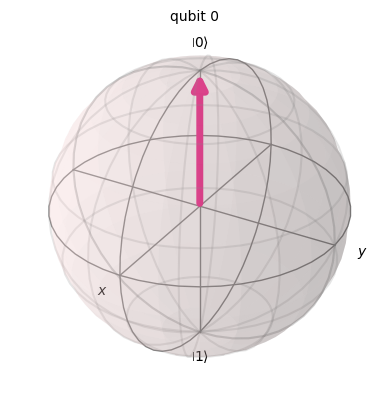

In [87]:
plot_bloch_multivector(final_state)

so if we initialze in one basis and measure in another, we will get a randomized outcome

## Y - basis Measurement

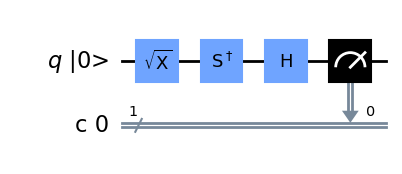

In [70]:
import numpy as np
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates
circuit.sx(0)

## y - basis measurement (default)
circuit.sdg(0)
circuit.h(0)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [71]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-71-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Initial state:

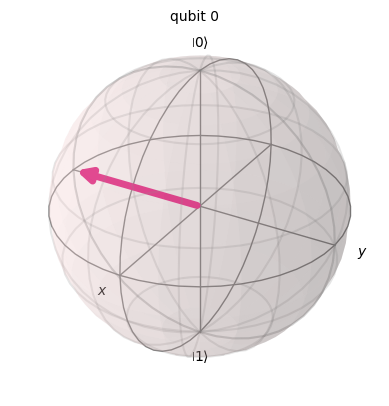

In [66]:
plot_bloch_multivector(final_state)

Final State:

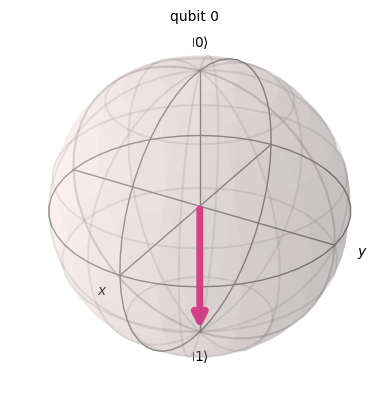

In [72]:
plot_bloch_multivector(final_state)

Now,

initializing in y - basis and measuring in z - basis

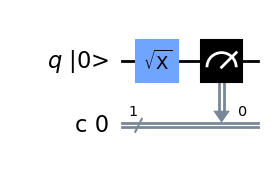

In [82]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates
circuit.sx(0)

## z - basis measurement (default)
# circuit.sdg(0)
# circuit.h(0)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [83]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-83-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


1st try:

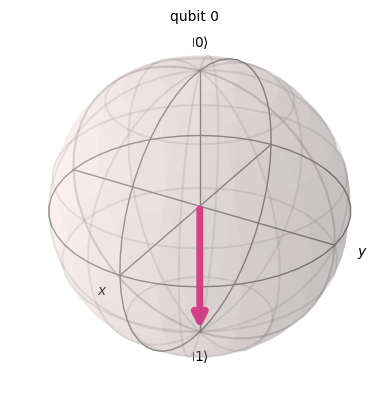

In [81]:
plot_bloch_multivector(final_state)

2nd try:

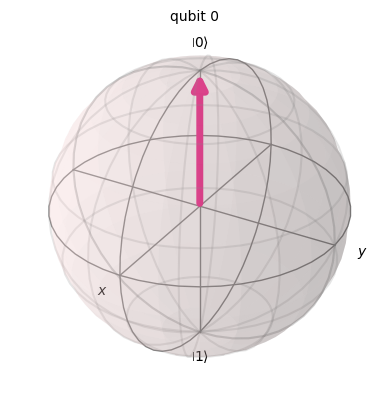

In [84]:
plot_bloch_multivector(final_state)

So we can clearly see, that initializing in one basis and measuring in another gives random outcomes

Now,

initializing in y - basis and measuring in x - basis

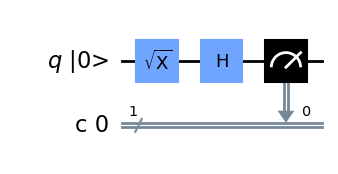

In [109]:
## create circuit
circuit = QuantumCircuit(1,1)

## apply gates
circuit.sx(0)

## z - basis measurement (default)
# circuit.sdg(0)
circuit.h(0)
circuit.measure(0, 0)

## drawing circuit
circuit.draw(output = 'mpl', initial_state = True)


In [110]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
# assembling the circuit gives us a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# get unitary
final_state = result.get_statevector()

<ipython-input-110-c561bd4c59c0>:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


Initial State:

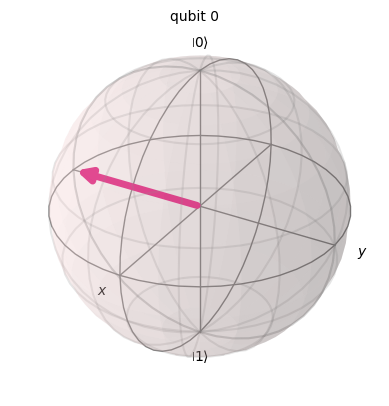

In [102]:
plot_bloch_multivector(final_state)

Final State:

1st try:

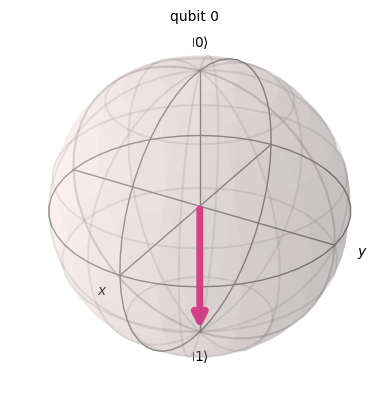

In [105]:
plot_bloch_multivector(final_state)

2nd try:

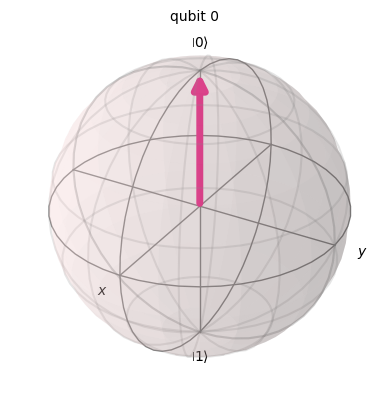

In [111]:
plot_bloch_multivector(final_state)

Just like before, initializing in one basis and measuring in another gives random outcomes.